# Predicting Advertisement Sales: A Multiple Linear Regression Approach

The aim of this project is to develop a predictive model using Multiple Linear Regression to forecast Advertisement Sales based on various advertising channels which includes TV,Radio, and Newspaper.
The goal is to identify the most effective advertising channels and understand how they contribute to sales,
enabling data-driven decisions to optimize advertising strategies and improve business outcomes.

* Objectives:

1) Analyze the relationship between TV, Radio and Newspaper advertising and Advertisement Sales

2. Develop a Multiple Linear Regression model to predict Advertisement sales based on advertising channel data

3. Evaluate the performance of the model and identify the most predictors of Advertisement Sales

* Variables:

1. TV (X_1)

2. Radio (X_2)

3. Newspaper (X_3)

4. Sales (Y)

* Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error

* Load Data

In [3]:
df= pd.read_csv('Advertising.csv')
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


* Descriptive Analysis

In [4]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


* Data Cleaning

In [7]:
df.drop(labels='Unnamed: 0',axis=1,inplace=True)

* Exploratory Data Analysis

   Data Correlation

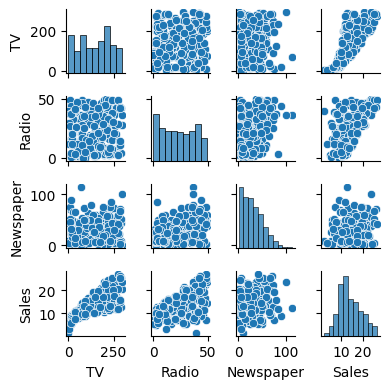

In [8]:
sns.pairplot(df,height=1.0)
plt.tight_layout()

* Collinearity Check

In [9]:
correlation= df.corr()
print(correlation)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


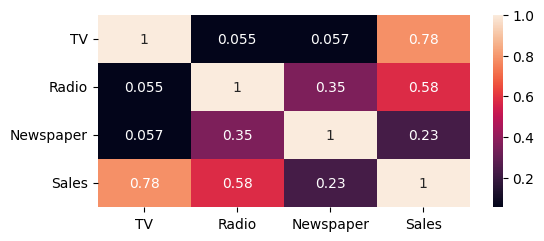

In [10]:
plt.figure(figsize=(6,2.5))
corr= df.corr()
sns.heatmap(corr,annot=True)
plt.show()

* Splitting DataFrame

In [11]:
x= df[['TV','Radio','Newspaper']]
y= df['Sales']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

* Scaling Predictors

In [12]:
sc= MinMaxScaler()
sc= sc.fit_transform(df[["Newspaper","Radio","TV"]])

* Defining Features

In [34]:
sc_x= df[['TV','Radio','Newspaper']]
sc_y= df[['Sales']]

* Model Deployment

In [36]:
sc_x_train,sc_x_test,sc_y_train,sc_y_test= train_test_split(sc_x,sc_y,test_size=0.25,random_state=42)

In [37]:
m= LinearRegression()
m.fit(sc_x_train,sc_y_train)

LinearRegression()

* Predictions

In [38]:
prediction= m.predict(sc_x_test)
score= m.score(sc_x_test,sc_y_test)
print(prediction[0])
print(score)

[16.38348211]
0.8935163320163658


* Error Score

In [39]:
mse= mean_squared_error(sc_y_test,prediction)
rmse= root_mean_squared_error(sc_y_test,prediction)
print(mse)
print(rmse)

2.880023730094191
1.6970632663793623


Author: Jones Osele